In [1]:
import re
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import gensim
from sklearn.model_selection import train_test_split
import spacy
import pickle
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
import tensorflow as tf
import keras
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv('IMDB Dataset.csv')

In [15]:
train.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,Positive
1,A wonderful little production. <br /><br />The...,Positive
2,I thought this was a wonderful way to spend ti...,Positive
3,Basically there's a family where a little boy ...,Negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",Positive


In [8]:
train['sentiment'].unique()

array(['Positive', 'Negative'], dtype=object)

In [9]:
train.groupby('sentiment').nunique()

,review
sentiment,
Negative,24698
Positive,24884


# The next steps about data cleaning will be:
Remove URLs from the tweets <br>
Remove emails <br>
Tokenize text <br>
Remove new lines characters <br>
Remove distracting single quotes <br>

Remove all punctuation signs <br>
Lowercase all text <br>
Detokenize text <br>
Convert list of texts to Numpy array <br>

In [12]:
def depure_data(data):
    
    #Removing URLs with a regular expression
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    data = url_pattern.sub(r'', data)

    # Remove Emails
    data = re.sub('\S*@\S*\s?', '', data)

    # Remove new line characters
    data = re.sub('\s+', ' ', data)

    # Remove distracting single quotes
    data = re.sub("\'", "", data)
        
    return data

In [16]:
temp = []
#Splitting pd.Series to list
data_to_list = train['review'].values.tolist()
for i in range(len(data_to_list)):
    temp.append(depure_data(data_to_list[i]))
#list(temp[:5]) # show first five rows

## Break up each tweet into individual words and remove punctuation

In [18]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
        

data_words = list(sent_to_words(temp))

print(data_words[:1])

[['one', 'of', 'the', 'other', 'reviewers', 'has', 'mentioned', 'that', 'after', 'watching', 'just', 'oz', 'episode', 'youll', 'be', 'hooked', 'they', 'are', 'right', 'as', 'this', 'is', 'exactly', 'what', 'happened', 'with', 'me', 'br', 'br', 'the', 'first', 'thing', 'that', 'struck', 'me', 'about', 'oz', 'was', 'its', 'brutality', 'and', 'unflinching', 'scenes', 'of', 'violence', 'which', 'set', 'in', 'right', 'from', 'the', 'word', 'go', 'trust', 'me', 'this', 'is', 'not', 'show', 'for', 'the', 'faint', 'hearted', 'or', 'timid', 'this', 'show', 'pulls', 'no', 'punches', 'with', 'regards', 'to', 'drugs', 'sex', 'or', 'violence', 'its', 'is', 'hardcore', 'in', 'the', 'classic', 'use', 'of', 'the', 'word', 'br', 'br', 'it', 'is', 'called', 'oz', 'as', 'that', 'is', 'the', 'nickname', 'given', 'to', 'the', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'it', 'focuses', 'mainly', 'on', 'emerald', 'city', 'an', 'experimental', 'section', 'of', 'the', 'prison', 'where', 'all', 't

In [20]:
len(data_words) #data_words contain 50,000 list, with each list containing one tweet separated into individual words

50000

In [21]:
def detokenize(text):
    return TreebankWordDetokenizer().detokenize(text)

In [23]:
data = []
for i in range(len(data_words)):
    data.append(detokenize(data_words[i]))
print(data[:5])

['one of the other reviewers has mentioned that after watching just oz episode youll be hooked they are right as this is exactly what happened with me br br the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the word br br it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to many aryans muslims gangstas latinos christians italians irish and more so scuffles death stares dodgy dealings and shady agreements are never far away br br would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare fo

In [62]:
data = np.array(data)

MemoryError: Unable to allocate 2.44 GiB for an array with shape (50000,) and data type <U13081

In [61]:
labels = np.array(train['sentiment'])
y = []
for i in range(len(labels)):
    if labels[i] == 'Negative':
        y.append(0)
    if labels[i] == 'Positive':
        y.append(1)
y = np.array(y)
labels = tf.keras.utils.to_categorical(y, 2, dtype="float32")
del y

In [60]:
len(labels)

50000

## Data sequencing and splitting

In [64]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint

In [157]:
max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data)
sequences = tokenizer.texts_to_sequences(data)
tweets = pad_sequences(sequences, maxlen=max_len)

## Splitting the data

In [165]:
X_train, X_test, y_train, y_test = train_test_split(tweets,labels, random_state=0, test_size = 0.5)
print (len(X_train),len(X_test),len(y_train),len(y_test))

25000 25000 25000 25000


In [146]:
model1 = Sequential()
model1.add(layers.Embedding(max_words, 20))
model1.add(layers.LSTM(15,dropout=0.6))
model1.add(layers.Dense(2,activation='sigmoid'))

model1.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])
#Implementing model checkpoins to save the best metric and do not lose it on training.
checkpoint1 = ModelCheckpoint("best_model1.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model1.fit(X_train, y_train, epochs=20,validation_data=(X_test, y_test),callbacks=[checkpoint1])

Epoch 1/20
1172/1172 [==============================] - ETA: 0s - loss: 0.5167 - accuracy: 0.7414
Epoch 00001: val_accuracy improved from -inf to 0.79272, saving model to best_model1.hdf5
1172/1172 [==============================] - 11s 10ms/step - loss: 0.5167 - accuracy: 0.7414 - val_loss: 0.4438 - val_accuracy: 0.7927
Epoch 2/20
1171/1172 [============================>.] - ETA: 0s - loss: 0.4318 - accuracy: 0.7998
Epoch 00002: val_accuracy improved from 0.79272 to 0.80096, saving model to best_model1.hdf5
1172/1172 [==============================] - 11s 9ms/step - loss: 0.4317 - accuracy: 0.7998 - val_loss: 0.4299 - val_accuracy: 0.8010
Epoch 3/20
1169/1172 [============================>.] - ETA: 0s - loss: 0.4214 - accuracy: 0.8037
Epoch 00003: val_accuracy did not improve from 0.80096
1172/1172 [==============================] - 11s 9ms/step - loss: 0.4214 - accuracy: 0.8036 - val_loss: 0.4304 - val_accuracy: 0.8004
Epoch 4/20
1171/1172 [============================>.] - ETA: 0s -

In [166]:
model2 = Sequential()
model2.add(layers.Embedding(max_words, 40, input_length=max_len))
model2.add(layers.Bidirectional(layers.LSTM(40,dropout=0.7)))
model2.add(layers.Dense(2,activation='sigmoid'))
model2.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
#Implementing model checkpoins to save the best metric and do not lose it on training.
checkpoint2 = ModelCheckpoint("best_model2.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model2.fit(X_train, y_train, epochs=15,validation_data=(X_test, y_test),callbacks=[checkpoint2])

Epoch 1/15
782/782 [==============================] - ETA: 0s - loss: 0.4679 - accuracy: 0.7754
Epoch 00001: val_accuracy improved from -inf to 0.85604, saving model to best_model2.hdf5
782/782 [==============================] - 61s 78ms/step - loss: 0.4679 - accuracy: 0.7754 - val_loss: 0.3516 - val_accuracy: 0.8560
Epoch 2/15
782/782 [==============================] - ETA: 0s - loss: 0.3076 - accuracy: 0.8746
Epoch 00002: val_accuracy improved from 0.85604 to 0.87516, saving model to best_model2.hdf5
782/782 [==============================] - 59s 76ms/step - loss: 0.3076 - accuracy: 0.8746 - val_loss: 0.3018 - val_accuracy: 0.8752
Epoch 3/15
782/782 [==============================] - ETA: 0s - loss: 0.2689 - accuracy: 0.8927 ETA: 0s - los - ETA: 0s - loss: 0.2691 - accuracy: 0.
Epoch 00003: val_accuracy improved from 0.87516 to 0.87636, saving model to best_model2.hdf5
782/782 [==============================] - 60s 77ms/step - loss: 0.2689 - accuracy: 0.8927 - val_loss: 0.3089 - val_

In [160]:
best_model = keras.models.load_model("best_model2.hdf5")

In [161]:
test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=2)
print('Model accuracy: ',test_acc)

391/391 - 6s - loss: 0.3024 - accuracy: 0.8937
Model accuracy:  0.8936799764633179


In [162]:
predictions = best_model.predict(X_test)

In [163]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test.argmax(axis=1), np.around(predictions, decimals=0).argmax(axis=1))

<AxesSubplot:>

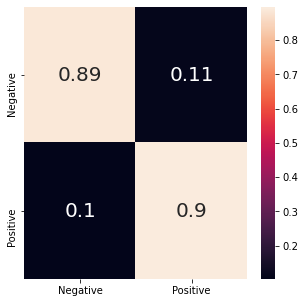

In [164]:
import seaborn as sns
conf_matrix = pd.DataFrame(matrix, index = ['Negative','Positive'],columns = ['Negative','Positive'])
#Normalizing
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (5,5))
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 20}) #vertical is actual, horizontal is prediction

In [156]:
conf_matrix

,Negative,Positive
Negative,0.858210,0.141790
Positive,0.100016,0.899984
